In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
whoop_data = pd.read_csv("whoop.data.csv")

In [4]:
del whoop_data['Blood oxygen %']
del whoop_data['Skin temp (celsius)']
del whoop_data['Cycle timezone']
del whoop_data['Cycle end time']
del whoop_data['Sleep onset']
del whoop_data['Wake onset']

In [5]:
whoop_data.replace('', np.nan, inplace=True)
whoop_data.dropna(inplace=True)

In [6]:
len(whoop_data)

371

In [7]:
whoop_data['Date'] = pd.to_datetime(whoop_data['Cycle start time']).dt.date
whoop_data['Cycle start time'] = pd.to_datetime(whoop_data['Cycle start time'])

In [8]:
whoop_data.drop(whoop_data[(whoop_data['Day Strain'] < 1.0)].index,inplace=True)

In [9]:
whoop_data['Day'] = pd.to_datetime(whoop_data['Cycle start time']).dt.dayofweek

In [10]:
def filter(x):
    if x == 0:
        return 'Monday'
    elif x == 1:
        return 'Tuesday'
    elif x == 2:
        return 'Wednesday'
    elif x == 3:
        return 'Thursday'
    elif x == 4:
        return 'Friday'
    elif x == 5:
        return 'Saturday'
    elif x == 6:
        return 'Sunday'

whoop_data['DayofWeek'] = whoop_data['Day'].apply(filter)

In [13]:
def color(x):
    if x >= 67:
        return 'Green'
    elif x >= 34 and x <= 66:
        return 'Yellow'
    else:
        return 'Red'

whoop_data['RecoveryColor'] = whoop_data['RecoveryScore'].apply(color)

In [14]:
def score(x):
    if x >= 40:
        return 1
    else:
        return 0

whoop_data['RecoveryFeeling'] = whoop_data['RecoveryScore'].apply(score)

In [15]:
def scores(x):
    if x >= 90:
        return 1
    else:
        return 0

whoop_data['RecoveryBestFeeling'] = whoop_data['RecoveryScore'].apply(scores)

In [12]:
whoop_data.rename(columns={'Cycle start time':'CycleStartTime','Recovery score %':'RecoveryScore','Resting heart rate (bpm)':'RHR','Heart rate variability (ms)':'HRV','Day Strain':'DayStrain','Energy burned (cal)':'CaloriesBurned','Max HR (bpm)':'MaxHR','Average HR (bpm)':'AverageHR','Sleep performance %':'SleepPerformance','Respiratory rate (rpm)':'RespiratoryRate','Asleep duration (min)':'SleepTime','In bed duration (min)':'InBedTime','Light sleep duration (min)':'LightSleep','Deep (SWS) duration (min)':'DeepSleep','REM duration (min)':'REMSleep','Awake duration (min)':'AwakeTime','Sleep need (min)':'SleepNeed','Sleep debt (min)':'SleepDebt','Sleep efficiency %':'SleepEfficiency'},inplace=True)

In [16]:
print(whoop_data.keys())

Index(['CycleStartTime', 'RecoveryScore', 'RHR', 'HRV', 'DayStrain',
       'CaloriesBurned', 'MaxHR', 'AverageHR', 'SleepPerformance',
       'RespiratoryRate', 'SleepTime', 'InBedTime', 'LightSleep', 'DeepSleep',
       'REMSleep', 'AwakeTime', 'SleepNeed', 'SleepDebt', 'SleepEfficiency',
       'Date', 'Day', 'DayofWeek', 'RecoveryColor', 'RecoveryFeeling',
       'RecoveryBestFeeling'],
      dtype='object')


In [93]:
whoop_data.to_csv('whoop_data2.csv', index=False)

# EDA

In [17]:
whoop_data.describe()

,RecoveryScore,RHR,HRV,DayStrain,CaloriesBurned,MaxHR,AverageHR,SleepPerformance,RespiratoryRate,SleepTime,...,LightSleep,DeepSleep,REMSleep,AwakeTime,SleepNeed,SleepDebt,SleepEfficiency,Day,RecoveryFeeling,RecoveryBestFeeling
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,...,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,64.167568,54.089189,71.251351,10.886757,2536.627027,162.372973,70.202703,83.216216,16.714595,438.143243,...,198.524324,86.924324,152.694595,44.037838,521.656757,41.932432,90.905405,3.159459,0.900000,0.145946
std,20.216418,2.702030,12.105859,3.127128,392.859997,16.202523,4.483574,15.423621,0.532828,84.289722,...,51.271325,20.743882,42.312442,23.684779,43.485144,36.335135,4.195652,2.018607,0.300406,0.353530
min,1.000000,46.000000,19.000000,2.300000,966.000000,108.000000,59.000000,11.000000,15.000000,51.000000,...,49.000000,0.000000,0.000000,7.000000,276.000000,0.000000,69.000000,0.000000,0.000000,0.000000
25%,51.000000,52.000000,64.000000,8.800000,2284.500000,154.000000,67.000000,77.000000,16.400000,398.000000,...,167.250000,75.250000,127.000000,29.000000,498.000000,15.000000,89.000000,1.000000,1.000000,0.000000
50%,63.000000,54.000000,71.000000,11.200000,2522.000000,164.000000,70.000000,86.000000,16.700000,450.000000,...,196.000000,88.000000,152.500000,39.000000,522.000000,38.500000,92.000000,3.000000,1.000000,0.000000
75%,80.000000,56.000000,79.000000,13.100000,2755.750000,172.000000,73.000000,95.000000,17.100000,492.000000,...,229.000000,99.750000,182.000000,53.000000,545.000000,59.750000,94.000000,5.000000,1.000000,0.000000
max,99.000000,72.000000,121.000000,18.700000,3987.000000,207.000000,86.000000,100.000000,18.900000,645.000000,...,381.000000,144.000000,266.000000,146.000000,681.000000,211.000000,97.000000,6.000000,1.000000,1.000000


In [18]:
whoop_data.corr()

,RecoveryScore,RHR,HRV,DayStrain,CaloriesBurned,MaxHR,AverageHR,SleepPerformance,RespiratoryRate,SleepTime,...,LightSleep,DeepSleep,REMSleep,AwakeTime,SleepNeed,SleepDebt,SleepEfficiency,Day,RecoveryFeeling,RecoveryBestFeeling
RecoveryScore,1.000000,-0.707184,0.803123,0.073771,0.066924,0.064540,-0.107053,0.450613,-0.332645,0.437013,...,0.317579,0.196171,0.389571,0.067050,-0.091952,-0.017586,0.091916,-0.000922,0.590008,0.619179
RHR,-0.707184,1.000000,-0.816254,-0.136266,-0.109693,-0.097885,0.220858,-0.256672,0.523323,-0.236322,...,-0.129036,-0.083669,-0.273396,-0.018473,0.082117,0.060788,-0.093678,0.034650,-0.469752,-0.379635
HRV,0.803123,-0.816254,1.000000,0.081282,0.067191,0.068161,-0.154174,0.198581,-0.384407,0.213152,...,0.128468,-0.018076,0.277809,-0.002803,-0.025107,0.046246,0.100884,-0.015174,0.458518,0.537870
DayStrain,0.073771,-0.136266,0.081282,1.000000,0.840811,0.762935,0.656480,0.089449,0.032320,0.011319,...,0.006532,0.034321,-0.002193,-0.026927,-0.147413,-0.094655,0.004304,-0.251630,0.041859,-0.010013
CaloriesBurned,0.066924,-0.109693,0.067191,0.840811,1.000000,0.587101,0.484795,0.145469,0.029194,0.112744,...,0.071742,0.109080,0.084186,0.103708,-0.079935,-0.047572,-0.106030,-0.184801,0.051373,-0.023997
MaxHR,0.064540,-0.097885,0.068161,0.762935,0.587101,1.000000,0.450832,0.069449,-0.002861,0.008402,...,0.008631,0.033498,-0.010143,-0.072322,-0.114109,-0.072757,0.055255,-0.197619,0.033295,0.017912
AverageHR,-0.107053,0.220858,-0.154174,0.656480,0.484795,0.450832,1.000000,-0.050758,0.328866,-0.138081,...,-0.056579,-0.114493,-0.150380,-0.069997,-0.151567,-0.170524,-0.004308,-0.096105,-0.075452,-0.040941
SleepPerformance,0.450613,-0.256672,0.198581,0.089449,0.145469,0.069449,-0.050758,1.000000,-0.248597,0.910396,...,0.678733,0.624497,0.684976,0.308492,-0.306252,-0.166003,0.035830,-0.062041,0.382522,0.190514
RespiratoryRate,-0.332645,0.523323,-0.384407,0.032320,0.029194,-0.002861,0.328866,-0.248597,1.000000,-0.287825,...,-0.062737,-0.256561,-0.371568,-0.092619,-0.076733,-0.036693,-0.013321,0.059057,-0.314236,-0.140818
SleepTime,0.437013,-0.236322,0.213152,0.011319,0.112744,0.008402,-0.138081,0.910396,-0.287825,1.000000,...,0.747275,0.684188,0.751156,0.350625,0.042936,-0.002028,0.038116,-0.064864,0.388537,0.195189


In [19]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [20]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
whoop_data['DayofWeek'] = whoop_data['DayofWeek'].astype(cat_type)

Text(0.5, 1.0, 'Day Strain by Days')

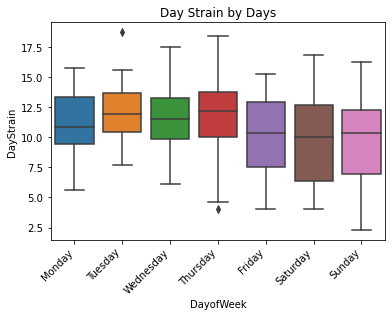

In [21]:
box = sns.boxplot(x = whoop_data['DayofWeek'],
            y = whoop_data['DayStrain'])
plt.xticks(rotation=45,ha='right')
plt.title('Day Strain by Days')

Text(0.5, 1.0, 'Sleeptime by Days')

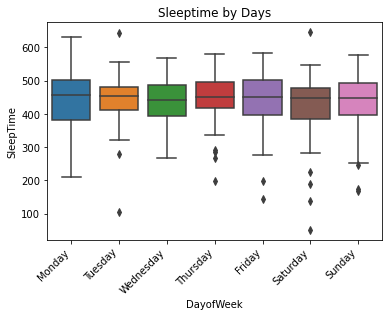

In [22]:
box = sns.boxplot(x = whoop_data['DayofWeek'],
            y = whoop_data['SleepTime'])
plt.xticks(rotation=45,ha='right')
plt.title('Sleeptime by Days')

Text(0.5, 1.0, 'Recovery Score by Days')

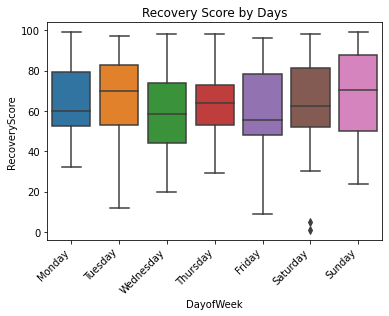

In [23]:
box = sns.boxplot(x = whoop_data['DayofWeek'],
            y = whoop_data['RecoveryScore'])
plt.xticks(rotation=45,ha='right')
plt.title('Recovery Score by Days')

Text(0, 0.5, 'Recovery Score')

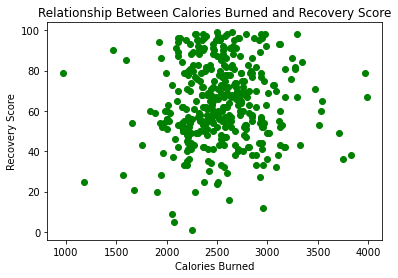

In [24]:
x = whoop_data['CaloriesBurned']
y = whoop_data['RecoveryScore']
plt.scatter(x, y,c='green')
plt.title('Relationship Between Calories Burned and Recovery Score')
plt.xlabel('Calories Burned')
plt.ylabel('Recovery Score')

Text(0.5, 1.0, 'Sleep Efficiency by Recovery Color')

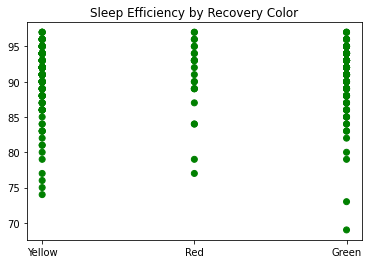

In [25]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Red':
            cols.append('red')
        elif l=='Yellow':
            cols.append('yellow')
        else:
            cols.append('green')
    return cols
cols=pltcolor(x)
x = whoop_data['RecoveryColor']
y = whoop_data['SleepEfficiency']
plt.scatter(x, y,c=cols)

plt.title('Sleep Efficiency by Recovery Color')

Text(0.5, 1.0, 'Deep Sleep Time by Recovery Color')

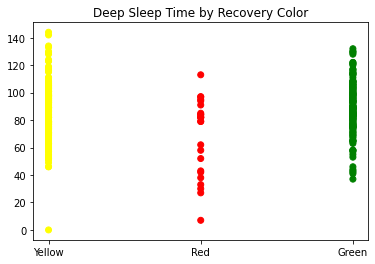

In [26]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Red':
            cols.append('red')
        elif l=='Yellow':
            cols.append('yellow')
        else:
            cols.append('green')
    return cols
cols=pltcolor(x)
x = whoop_data['RecoveryColor']
y = whoop_data['DeepSleep']
plt.scatter(x, y,c=cols)

plt.title('Deep Sleep Time by Recovery Color')

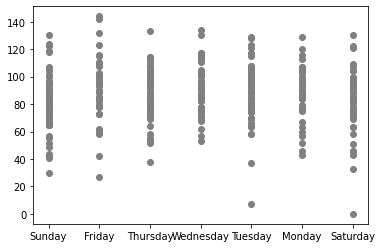

In [27]:
x = whoop_data['DayofWeek']
y = whoop_data['DeepSleep']
plt.scatter(x, y,c='Grey')

Text(0, 0.5, 'Daily Strain')

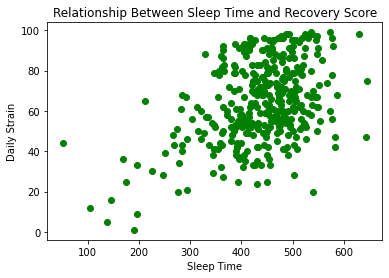

In [28]:
x = whoop_data['SleepTime']
y = whoop_data['RecoveryScore']
plt.scatter(x, y,c='green')
plt.title('Relationship Between Sleep Time and Recovery Score')
plt.xlabel('Sleep Time')
plt.ylabel('Daily Strain')

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Day Strain by Day of Week')

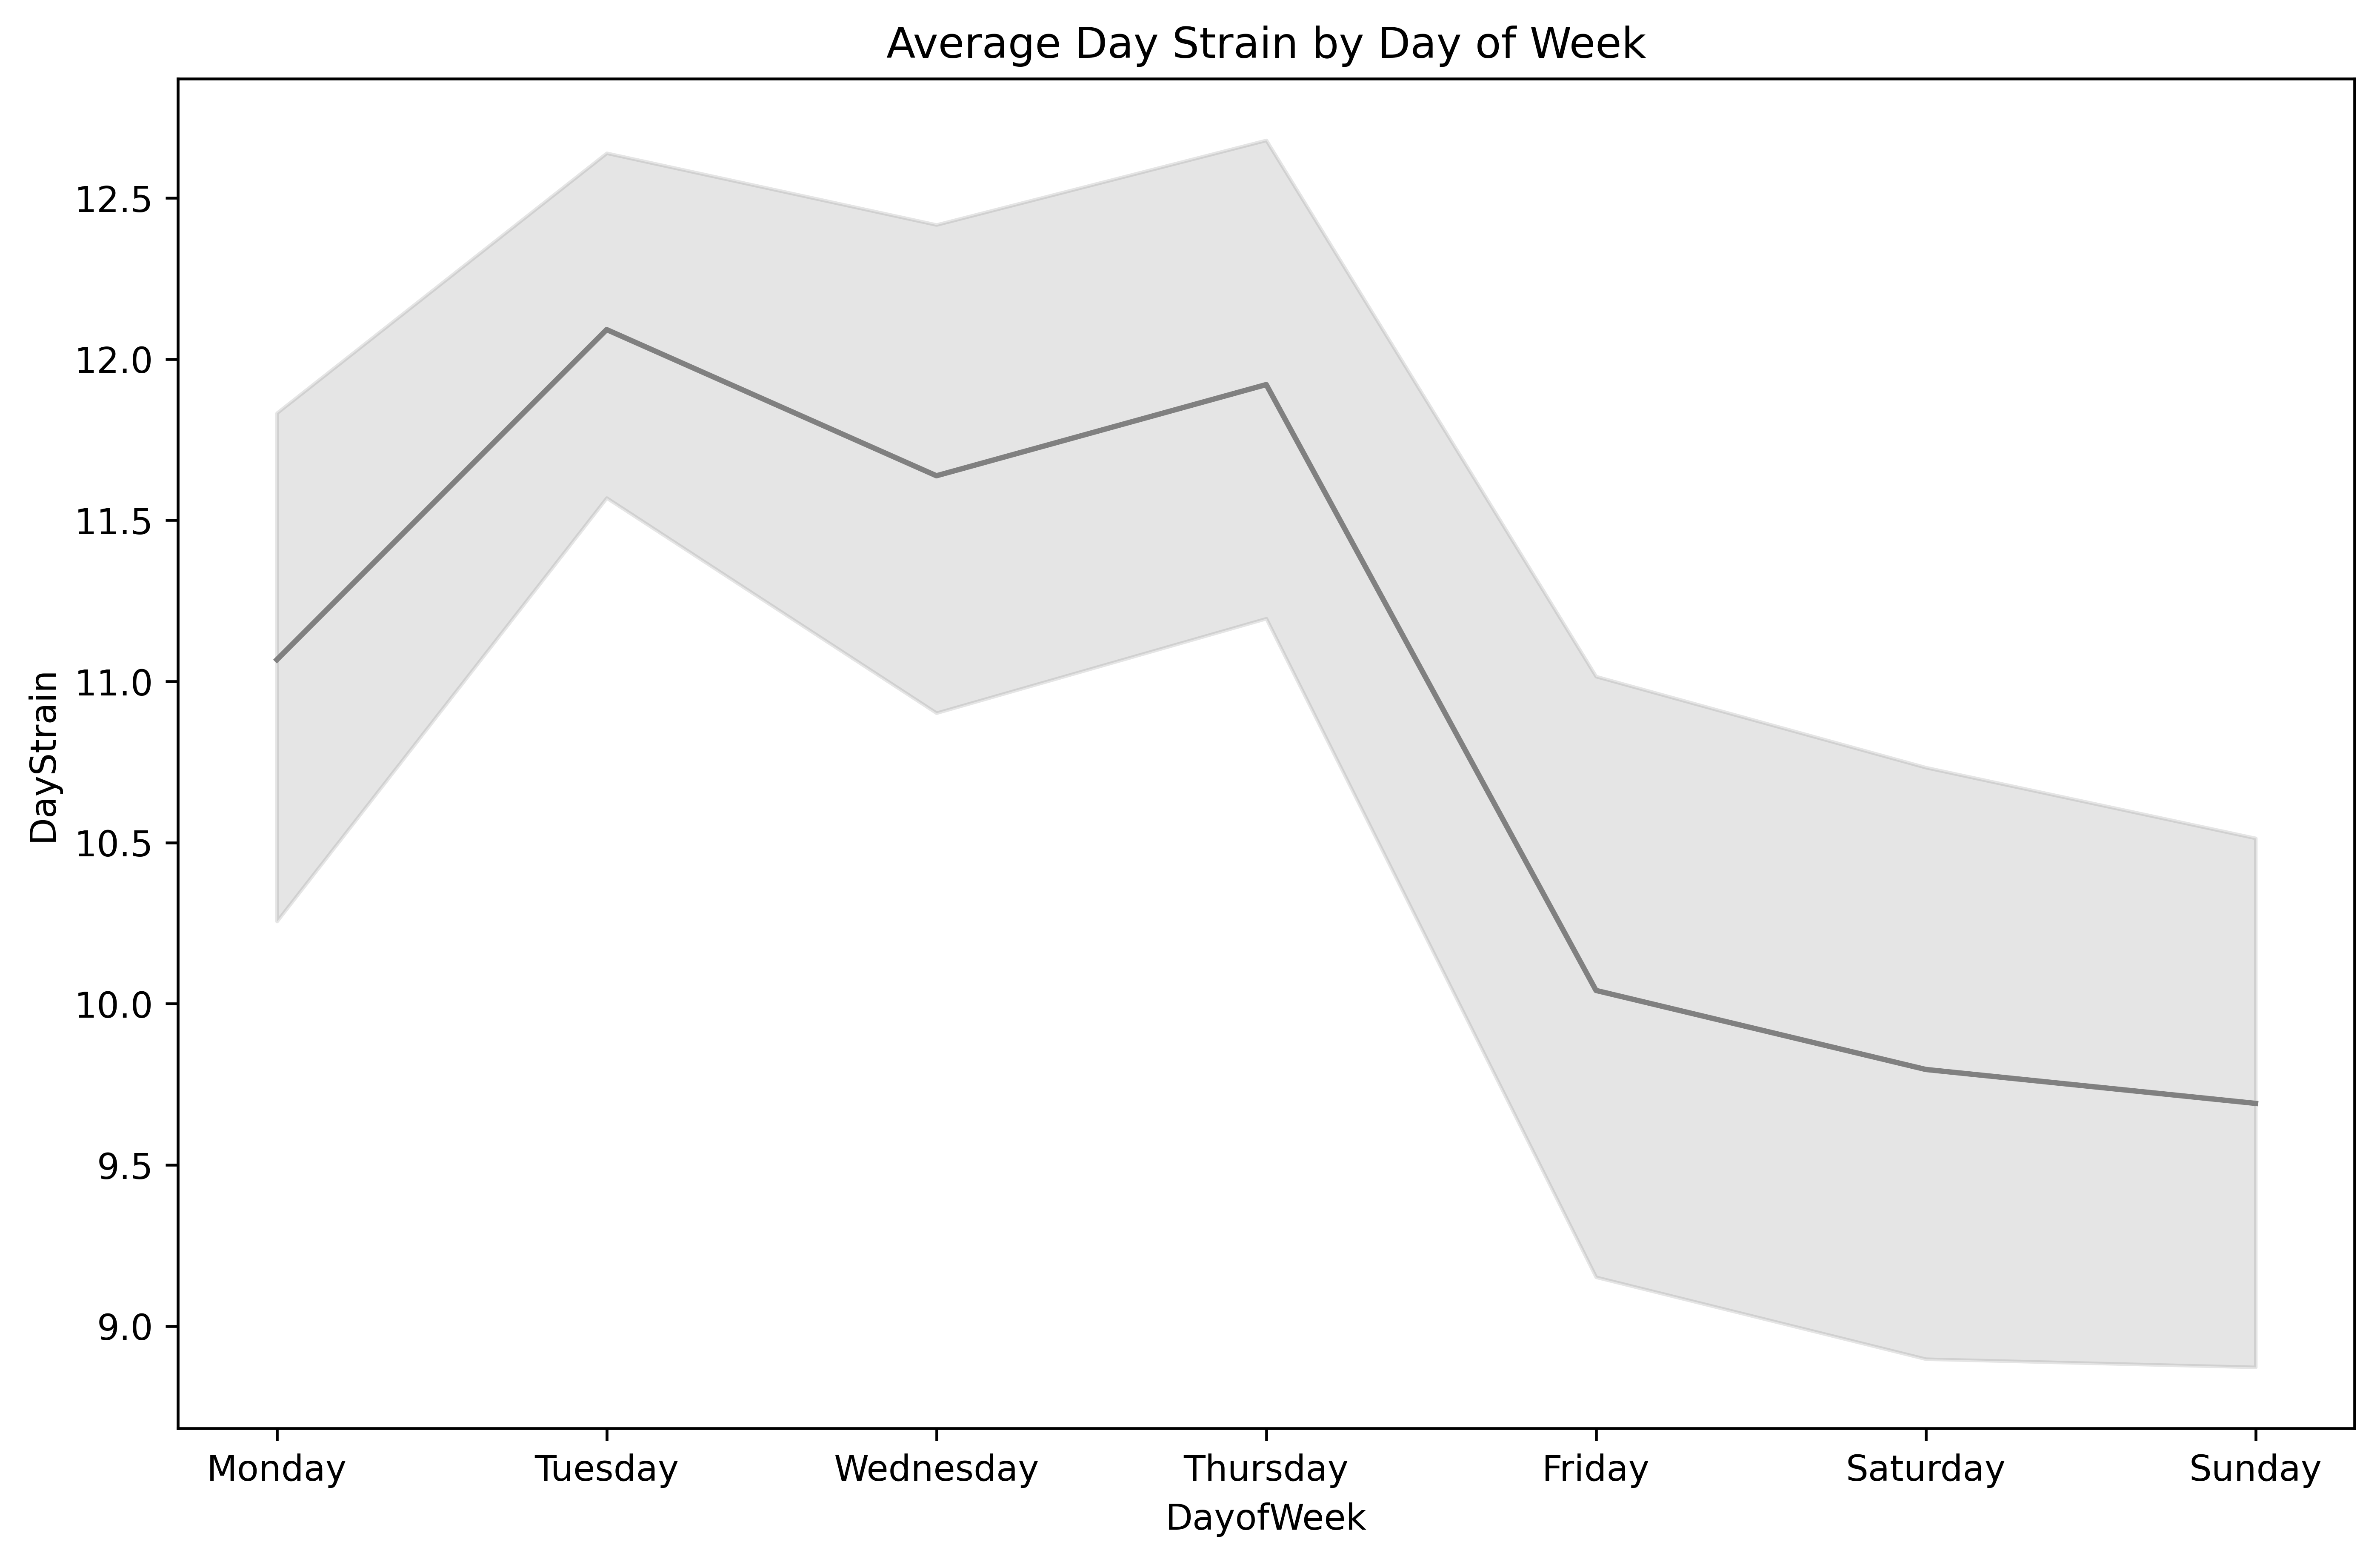

In [98]:
fig, ax = plt.subplots(figsize=(11,7), dpi=600)
x = whoop_data['DayofWeek']
y = whoop_data['DayStrain']
sns.lineplot(x, y,color='grey')
plt.title('Average Day Strain by Day of Week')

# Modeling

In [36]:
whoop_data.head()

,CycleStartTime,RecoveryScore,RHR,HRV,DayStrain,CaloriesBurned,MaxHR,AverageHR,SleepPerformance,RespiratoryRate,...,DeepSleep,REMSleep,AwakeTime,SleepNeed,SleepDebt,SleepEfficiency,Date,Day,DayofWeek,RecoveryColor
2,2022-08-28 02:01:00,41.0,55.0,49.0,12.1,2243.0,162.0,73.0,73.0,15.9,...,79.0,117.0,67.0,476.0,0.0,83.0,2022-08-28,6,Sunday,Yellow
3,2022-08-26 23:25:00,65.0,55.0,57.0,5.3,2289.0,135.0,66.0,100.0,15.9,...,93.0,172.0,80.0,475.0,0.0,86.0,2022-08-26,4,Friday,Yellow
4,2022-08-25 23:30:00,60.0,55.0,58.0,4.0,1833.0,108.0,64.0,100.0,16.3,...,103.0,181.0,86.0,478.0,0.0,87.0,2022-08-25,3,Thursday,Yellow
5,2022-08-24 22:13:00,20.0,62.0,42.0,7.1,2283.0,165.0,65.0,100.0,16.6,...,97.0,150.0,96.0,534.0,51.0,84.0,2022-08-24,2,Wednesday,Red
6,2022-08-23 23:37:00,36.0,61.0,45.0,9.3,2218.0,147.0,71.0,83.0,17.7,...,90.0,191.0,51.0,545.0,60.0,90.0,2022-08-23,1,Tuesday,Yellow


In [84]:
modeldata = whoop_data[['RHR','HRV','DayStrain','CaloriesBurned','MaxHR','AverageHR','SleepPerformance','RespiratoryRate','SleepTime','LightSleep','DeepSleep','REMSleep','AwakeTime','RecoveryFeeling']]

In [85]:
X = modeldata.drop(columns = 'RecoveryFeeling')
y = modeldata['RecoveryFeeling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [86]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = clf.fit(X_train,y_train)

In [87]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [88]:
prediction = clf.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.943089430894309

In [90]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, prediction, labels=[0,1])

array([[  8,   5],
       [  2, 108]])

In [91]:
feature_names = X.columns
feature_names

Index(['RHR', 'HRV', 'DayStrain', 'CaloriesBurned', 'MaxHR', 'AverageHR',
       'SleepPerformance', 'RespiratoryRate', 'SleepTime', 'LightSleep',
       'DeepSleep', 'REMSleep', 'AwakeTime'],
      dtype='object')

In [92]:
clf.feature_importances_

array([0.49607599, 0.15438829, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.34953571, 0.        ,
       0.        , 0.        , 0.        ])

In [93]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0,ascending=False)
feature_importance

,0
RHR,0.496076
SleepTime,0.349536
HRV,0.154388
DayStrain,0.000000
CaloriesBurned,0.000000
MaxHR,0.000000
AverageHR,0.000000
SleepPerformance,0.000000
RespiratoryRate,0.000000
LightSleep,0.000000


<AxesSubplot:>

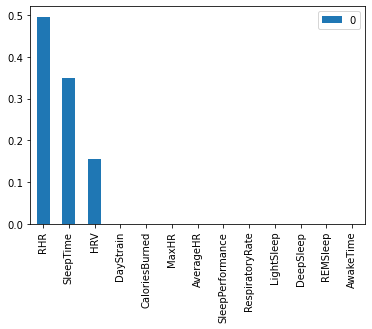

In [94]:
feature_importance.plot(kind='bar')

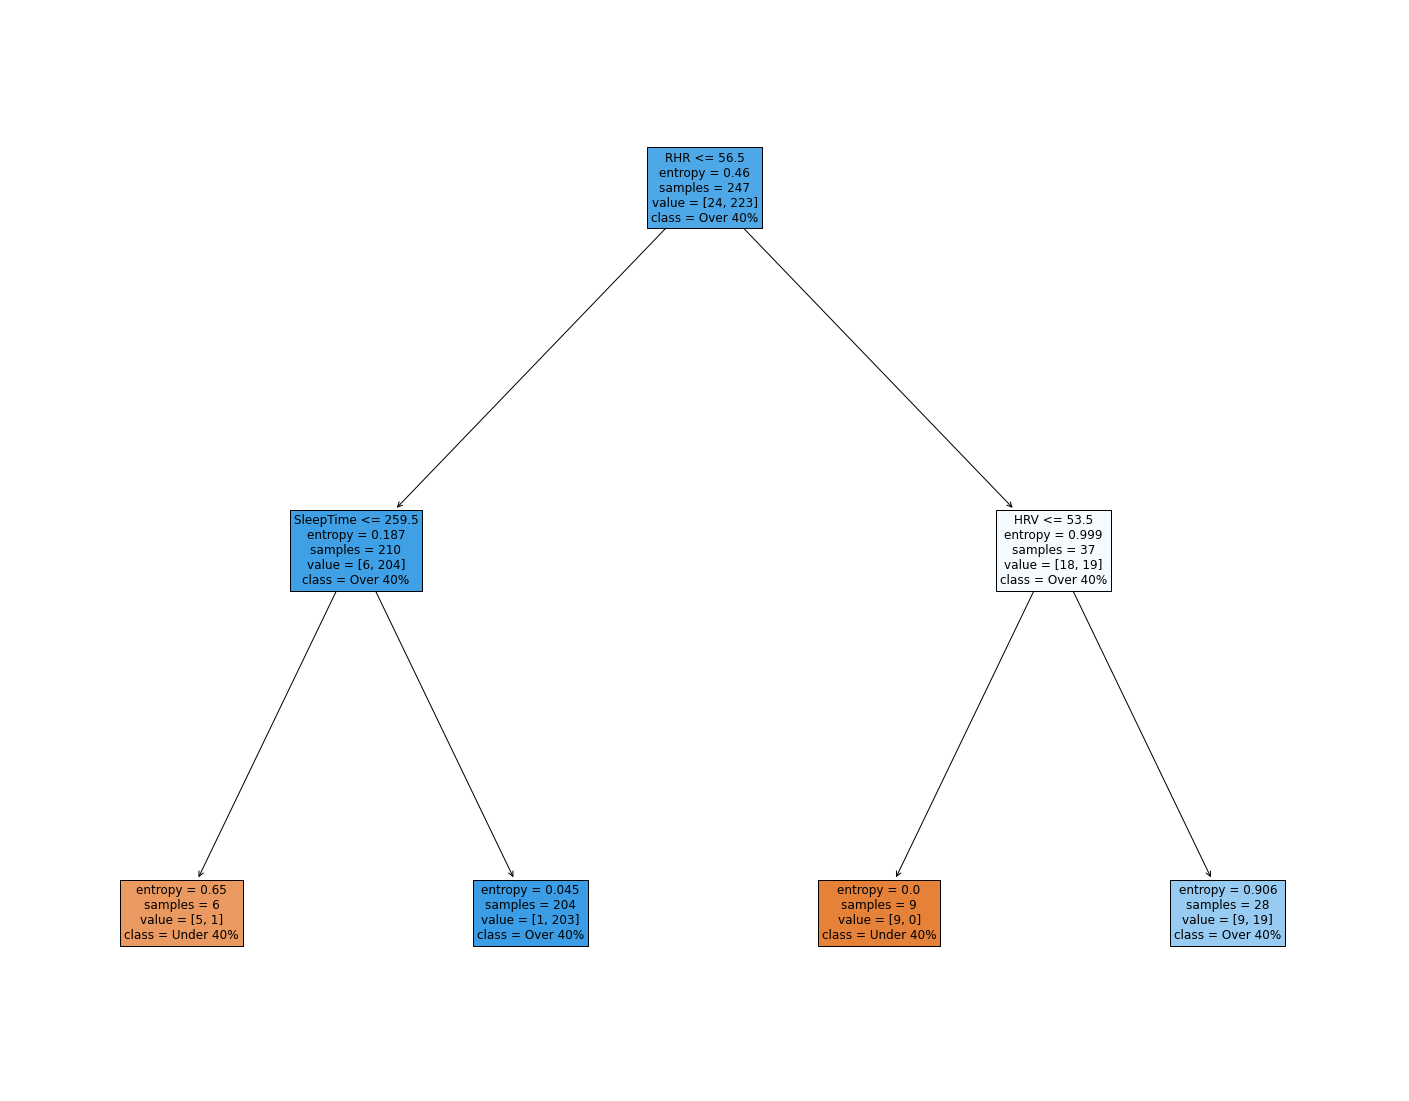

In [107]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = feature_names, class_names={0:'Under 40%',1:'Over 40%'}, filled=True,fontsize=12)


    acc_gini  acc_entropy  max_depth
0   0.943089     0.894309          1
1   0.951220     0.943089          2
2   0.967480     0.910569          3
3   0.943089     0.910569          4
4   0.934959     0.934959          5
5   0.918699     0.918699          6
6   0.943089     0.910569          7
7   0.910569     0.934959          8
8   0.910569     0.943089          9
9   0.951220     0.926829         10
10  0.910569     0.951220         11
11  0.926829     0.910569         12
12  0.951220     0.943089         13
13  0.910569     0.910569         14
14  0.951220     0.934959         15
15  0.934959     0.926829         16
16  0.926829     0.918699         17
17  0.951220     0.943089         18
18  0.926829     0.902439         19
19  0.943089     0.934959         20
20  0.910569     0.918699         21
21  0.951220     0.910569         22
22  0.943089     0.910569         23
23  0.918699     0.951220         24
24  0.926829     0.910569         25
25  0.910569     0.926829         26
2

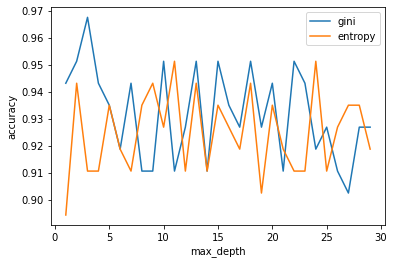

In [96]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))

 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))

 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

# Modeling 2 For Best Recovery

In [47]:
modeldatabest = whoop_data[['RHR','HRV','DayStrain','CaloriesBurned','MaxHR','AverageHR','SleepPerformance','RespiratoryRate','SleepTime','LightSleep','DeepSleep','REMSleep','AwakeTime','RecoveryBestFeeling']]

In [48]:
X = modeldatabest.drop(columns = 'RecoveryBestFeeling')
y = modeldatabest['RecoveryBestFeeling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [49]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_train,y_train)

In [50]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
prediction = clf.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [52]:
accuracy_score(y_test, prediction)

0.8699186991869918

In [53]:
confusion_matrix(y_test, prediction, labels=[0,1])

array([[103,   5],
       [ 11,   4]])

In [54]:
feature_names = X.columns
feature_names

Index(['RHR', 'HRV', 'DayStrain', 'CaloriesBurned', 'MaxHR', 'AverageHR',
       'SleepPerformance', 'RespiratoryRate', 'SleepTime', 'LightSleep',
       'DeepSleep', 'REMSleep', 'AwakeTime'],
      dtype='object')

In [55]:
clf.feature_importances_

array([0.        , 0.72050109, 0.04737698, 0.1446148 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08750713,
       0.        , 0.        , 0.        ])

In [56]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0,ascending=False)
feature_importance

,0
HRV,0.720501
CaloriesBurned,0.144615
LightSleep,0.087507
DayStrain,0.047377
RHR,0.000000
MaxHR,0.000000
AverageHR,0.000000
SleepPerformance,0.000000
RespiratoryRate,0.000000
SleepTime,0.000000


<AxesSubplot:>

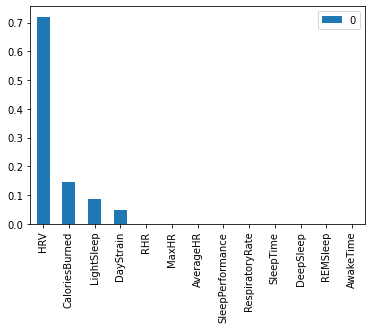

In [57]:
feature_importance.plot(kind='bar')

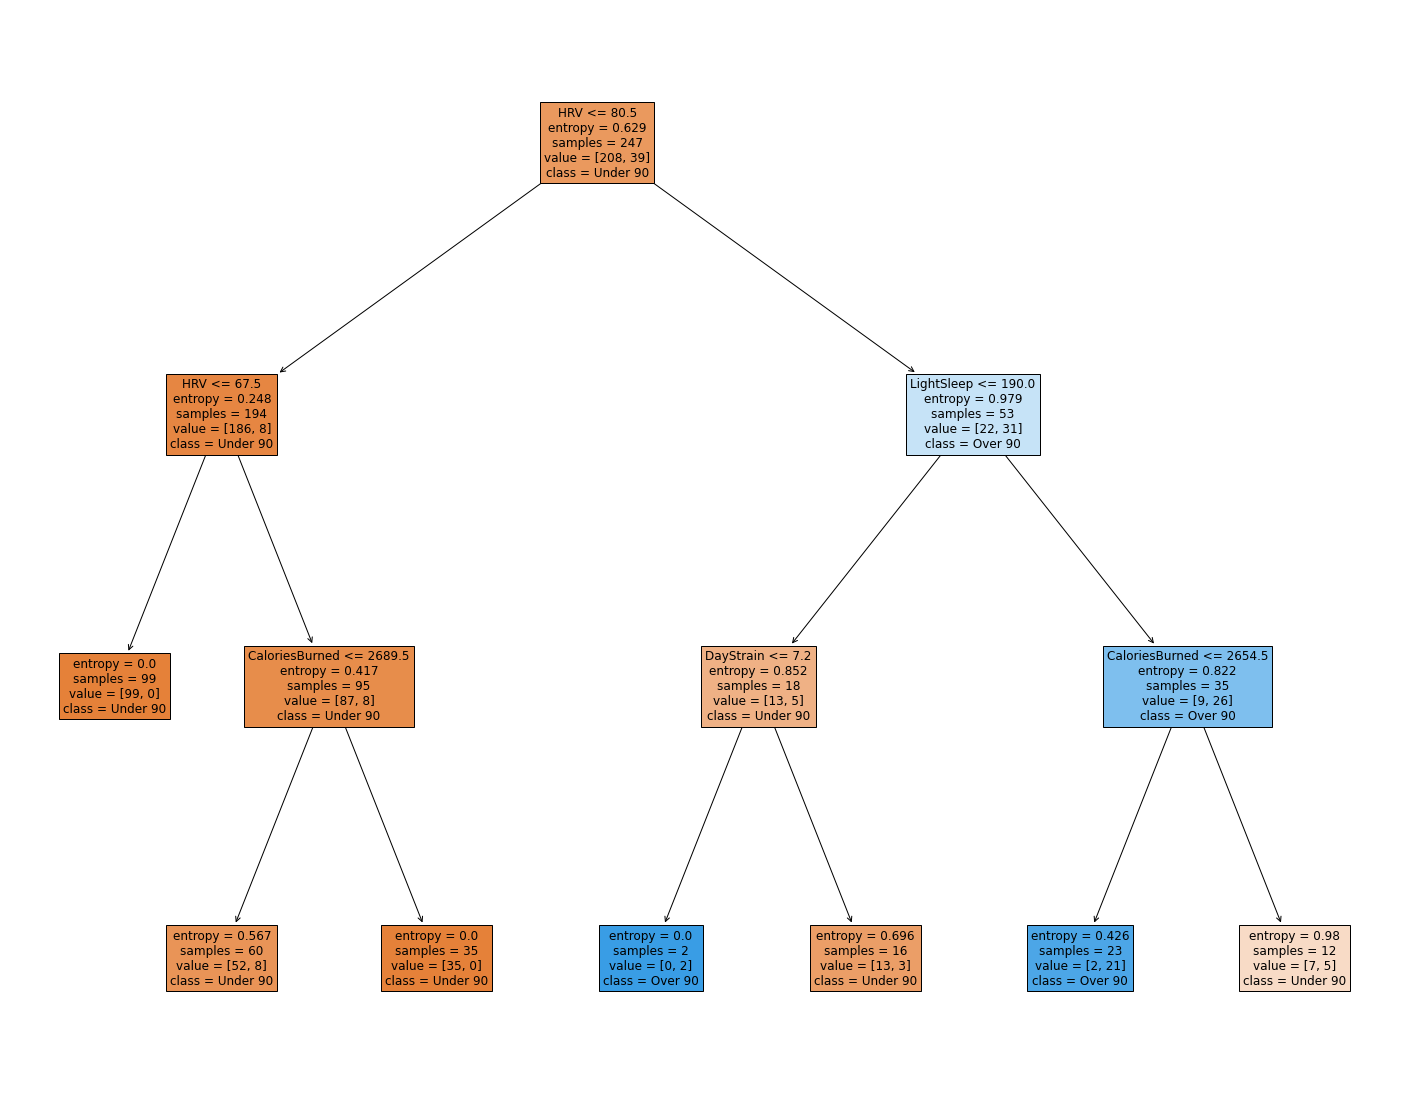

In [58]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = feature_names, class_names={0:'Under 90',1:'Over 90'}, filled=True,fontsize=12)


    acc_gini  acc_entropy  max_depth
0   0.837398     0.837398          1
1   0.804878     0.796748          2
2   0.804878     0.869919          3
3   0.861789     0.804878          4
4   0.813008     0.861789          5
5   0.796748     0.796748          6
6   0.739837     0.813008          7
7   0.796748     0.796748          8
8   0.731707     0.837398          9
9   0.764228     0.804878         10
10  0.764228     0.796748         11
11  0.739837     0.813008         12
12  0.731707     0.821138         13
13  0.747967     0.813008         14
14  0.739837     0.796748         15
15  0.739837     0.813008         16
16  0.747967     0.804878         17
17  0.804878     0.788618         18
18  0.747967     0.804878         19
19  0.788618     0.821138         20
20  0.764228     0.804878         21
21  0.731707     0.804878         22
22  0.739837     0.796748         23
23  0.739837     0.804878         24
24  0.756098     0.821138         25
25  0.788618     0.829268         26
2

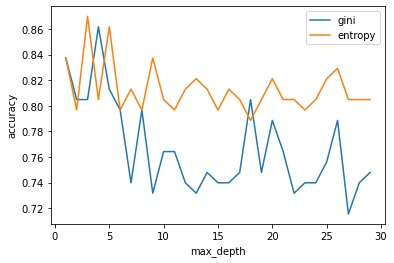

In [170]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

In [254]:
whoop_data['CaloriesBurned'].corr(whoop_data['SleepEfficiency'])

-0.10603009023931245

In [255]:
whoop_data['CaloriesBurned'].corr(whoop_data['SleepTime'])

0.11274423741980741

In [257]:
whoop_data['DayStrain'].corr(whoop_data['SleepEfficiency'])

0.004303809328393429

In [256]:
whoop_data['DayStrain'].corr(whoop_data['SleepTime'])

0.011318841186708076

In [97]:
whoop_data['RecoveryScore'].mean()

64.16756756756757